# Problema:

Imagine que você é um engenheiro de simulação na FlexSim e precisa escolher um novo laptop para rodar modelos 3D complexos. Ao criar simulações detalhadas de fábricas, aeroportos ou hospitais, seu computador precisa processar grandes quantidades de objetos 3D simultaneamente, tornando a escolha do equipamento crucial.

Uma das primeiras características que provavelmente chamará sua atenção é o tamanho da tela, já que visualizar modelos 3D detalhados exige uma boa área de trabalho visual. Mas será que laptops com telas maiores são necessariamente mais caros? E mais importante: será que um laptop com tela maior garantirá o melhor desempenho para suas simulações?

Hoje, vamos usar técnicas de análise de dados - as mesmas que utilizamos para otimizar processos em nossos modelos de simulação - para descobrir as relações entre as características dos laptops e seus preços. Isso nos ajudará a tomar uma decisão mais informada e baseada em dados, assim como fazemos ao apresentar resultados de simulações aos clientes.

## Passo 1: Importar as bibliotecas necessárias
Primeiro, precisamos importar as bibliotecas que vamos utilizar.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Passo 2: Carregar e preparar os dados
Vamos carregar o arquivo CSV e verificar as primeiras linhas.

In [2]:
url = 'https://github.com/allanspadini/codigos-alura-para-empresas/raw/refs/heads/main/laptop_prices.csv'

In [3]:
# Carregar os dados
df = pd.read_csv(url)

In [4]:
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [13]:
# Verificar a quantidade de valores nulos por coluna
print(df.isnull().sum())

# Verificar se há qualquer valor nulo no dataset
print(df.isnull().values.any())


Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64
False


## Passo 3: Identificar e escrever o nome das colunas numéricas e categóricas em duas listas diferentes

In [24]:
# Separação das variáveis
num_vars = ["RAM (GB)", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Price ($)"]
cat_vars = ["Brand", "Processor", "Storage", "GPU", "Resolution", "Operating System"]

In [7]:
# Criar cópia do dataframe para transformações
df_processed = df.copy()

## Passo 4: Aplicar Label Encoding para "Operating System"

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df_processed["Operating System"] = le.fit_transform(df_processed["Operating System"])

# Passo 5: Aplicar One-Hot Encoding para variáveis categóricas restantes

In [10]:
df_processed = pd.get_dummies(df_processed, columns=["Brand", "Processor", "Storage", "GPU", "Resolution"], drop_first=True)

# Resultados até agora

In [12]:
df_processed.head()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,...,Storage_512GB SSD,GPU_AMD Radeon RX 6800,GPU_Integrated,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160
0,64,17.3,8.9,1.42,0,3997.07,True,False,False,False,...,True,False,False,True,False,False,False,False,True,False
1,4,14.0,9.4,2.57,1,1355.78,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,32,13.3,8.5,1.74,0,2673.07,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,4,13.3,10.5,3.10,2,751.17,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4,16.0,5.7,3.38,1,2059.83,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Passo 6: Construir matriz de correlação das variáveis numéricas

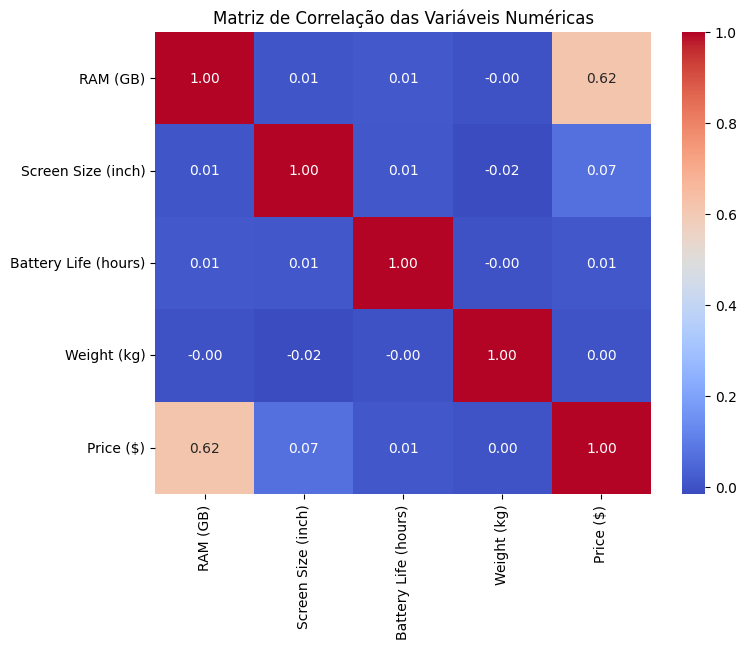

In [25]:
correlation_matrix = df_processed[num_vars].corr()

# Visualizar matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

# Passo 7: Dividir em X e y.

In [14]:
df_processed.shape

(11768, 35)

In [15]:
# Dividir os dados em X e y
X = df_processed.drop(columns=["Price ($)"])
y = df_processed["Price ($)"]

In [16]:
X.head()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,...,Storage_512GB SSD,GPU_AMD Radeon RX 6800,GPU_Integrated,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160
0,64,17.3,8.9,1.42,0,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
1,4,14.0,9.4,2.57,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,32,13.3,8.5,1.74,0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,4,13.3,10.5,3.10,2,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,4,16.0,5.7,3.38,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Passo 8: Dividir os dados em treino e teste

In [22]:
from sklearn.model_selection import train_test_split

In [26]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 9: Padronizar os dados

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [29]:
# Padronizar as variáveis numéricas com base apenas no conjunto de treino
scaler = StandardScaler()
X_train[num_vars[:-1]] = scaler.fit_transform(X_train[num_vars[:-1]])
X_test[num_vars[:-1]] = scaler.transform(X_test[num_vars[:-1]])

# Passo 10: Fazer a regressão linear

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

# Passo 11: Validar os resultados

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [34]:
# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando as métricas de avaliação
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Imprimindo os resultados
print(f'R² Score: {r2:.4f}')
print(f'Erro Quadrático Médio (RMSE): {rmse:.4f}')
print(f'Erro Absoluto Médio (MAE): {mae:.4f}')

# Se quiser ver os coeficientes do modelo
print('\nCoeficientes:')
for feature, coef in zip(X_train.columns, modelo.coef_):
    print(f'{feature}: {coef:.4f}')

print(f'\nIntercept: {modelo.intercept_:.4f}')

R² Score: 0.8795
Erro Quadrático Médio (RMSE): 462.0690
Erro Absoluto Médio (MAE): 320.0612

Coeficientes:
RAM (GB): 813.1132
Screen Size (inch): 85.5033
Battery Life (hours): 3.6539
Weight (kg): -4.8060
Operating System: -0.5475
Brand_Apple: 977.3179
Brand_Asus: 10.8845
Brand_Dell: 7.7312
Brand_HP: 29.1433
Brand_Lenovo: -16.2778
Brand_MSI: 591.7713
Brand_Microsoft: 17.2752
Brand_Razer: 775.2951
Brand_Samsung: 17.0725
Processor_AMD Ryzen 5: 306.3239
Processor_AMD Ryzen 7: 729.3004
Processor_AMD Ryzen 9: 1507.5258
Processor_Intel i3: -24.1925
Processor_Intel i5: 288.0328
Processor_Intel i7: 733.8101
Processor_Intel i9: 1489.8557
Storage_1TB SSD: 376.4529
Storage_256GB SSD: 374.5662
Storage_2TB SSD: 372.4314
Storage_512GB SSD: 362.3929
GPU_AMD Radeon RX 6800: 25.0582
GPU_Integrated: -682.6737
GPU_Nvidia GTX 1650: 30.4563
GPU_Nvidia RTX 2060: 18.6877
GPU_Nvidia RTX 3060: 12.7298
GPU_Nvidia RTX 3080: 13.1962
Resolution_1920x1080: 287.0780
Resolution_2560x1440: 742.1464
Resolution_3840x2160

# Árvores de regressão

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
# Criando e treinando o modelo
arvore = DecisionTreeRegressor(random_state=42)  # para reprodutibilidade
arvore.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
# Fazendo previsões
y_pred = arvore.predict(X_test)

# Calculando métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Imprimindo resultados
print(f'R² Score: {r2:.4f}')
print(f'Erro Quadrático Médio (RMSE): {rmse:.4f}')
print(f'Erro Absoluto Médio (MAE): {mae:.4f}')

# Importância das features
importancia = pd.DataFrame({
    'Feature': X_train.columns,
    'Importância': arvore.feature_importances_
})
print('\nImportância das Features:')
print(importancia.sort_values('Importância', ascending=False))


R² Score: 0.9389
Erro Quadrático Médio (RMSE): 328.9363
Erro Absoluto Médio (MAE): 218.6752

Importância das Features:
                   Feature  Importância
0                 RAM (GB)     0.388144
33    Resolution_3840x2160     0.155574
20      Processor_Intel i9     0.094048
16   Processor_AMD Ryzen 9     0.085537
5              Brand_Apple     0.046822
26          GPU_Integrated     0.043641
32    Resolution_2560x1440     0.043047
12             Brand_Razer     0.030440
15   Processor_AMD Ryzen 7     0.021977
10               Brand_MSI     0.021256
19      Processor_Intel i7     0.021056
1       Screen Size (inch)     0.009638
31    Resolution_1920x1080     0.008448
3              Weight (kg)     0.006137
2     Battery Life (hours)     0.005082
14   Processor_AMD Ryzen 5     0.003551
18      Processor_Intel i5     0.003187
4         Operating System     0.003037
17      Processor_Intel i3     0.001090
21         Storage_1TB SSD     0.000935
28     GPU_Nvidia RTX 2060     0.000877
2

# Ajustando hiperparâmetros

In [40]:
# Árvore com parâmetros ajustados
arvore_ajustada = DecisionTreeRegressor(
    max_depth=5,              # profundidade máxima
    min_samples_split=5,      # mínimo de amostras para split
    min_samples_leaf=2,       # mínimo de amostras em folhas
    random_state=42
)
arvore_ajustada.fit(X_train, y_train)

# Previsões com a árvore ajustada
y_pred_ajustada = arvore_ajustada.predict(X_test)

# Métricas da árvore ajustada
print("\nResultados com árvore ajustada:")
print(f'R² Score: {r2_score(y_test, y_pred_ajustada):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ajustada)):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_ajustada):.4f}')



Resultados com árvore ajustada:
R² Score: 0.7592
RMSE: 653.2703
MAE: 492.3736


In [41]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para teste
parametros = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    parametros,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Melhores parâmetros
print("\nMelhores parâmetros:", grid_search.best_params_)

# Melhor modelo
melhor_arvore = grid_search.best_estimator_
y_pred_melhor = melhor_arvore.predict(X_test)

print("\nResultados com melhores parâmetros:")
print(f'R² Score: {r2_score(y_test, y_pred_melhor):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_melhor)):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_melhor):.4f}')



Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Resultados com melhores parâmetros:
R² Score: 0.9234
RMSE: 368.5260
MAE: 273.9219
